
<a href="https://githubtocolab.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_TP.ipynb" target="_parent\">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" > </a>


# Algoritmos de optimización <br>
Nombre y Apellidos: Miguel López Vélez <br>
Url: [Trabajo Práctico](https://github.com/Astolfo2332/VIU_act/blob/main/optimizacion/Algoritmos_TP.ipynb)<br>
Problema:
> 1. Sesiones de doblaje <br>
> 2. Organizar los horarios de partidos de La Liga<br>
> 3. Combinar cifras y operaciones

Descripción del problema:

- El problema consiste en analizar el siguiente problema y diseñar un algoritmo que lo resuelva.
- Disponemos de las 9 cifras del 1 al 9 (excluimos el cero) y de los 4 signos básicos de las operaciones fundamentales: suma(+), resta(-), multiplicación(*) y división(/)
- Debemos combinarlos alternativamente sin repetir ninguno de ellos para obtener una cantidad dada. Un ejemplo sería para obtener el 4:

$$
4+2-6/3*1 = 4
$$

Debe analizarse el problema para encontrar todos los valores enteros posibles planteando las siguientes cuestiones:
- ¿Qué valor máximo y mínimo se pueden obtener según las condiciones del problema?
- ¿Es posible encontrar todos los valores enteros posibles entre dicho mínimo y máximo?



(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?<br>



¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.




Respuesta

Inicialmente, debemos determinar las restricciones del problema, las cuales son las siguientes:
- No se pueden repetir los números
- No se pueden repetir los signos
- Se deben alternar los números y los signos
- Los resultados deben ser enteros

De esta forma la cantidad de posibilidades se limitan por el número de signos, ya que solo podemos usar 4 a la vez limita el uso de los números a 5, y estos al no poder repetirse lo vuelve un problema de permutación, porque el orden no importa:

$$
P_{9,5} = \frac{9!}{9!-5!} = 15120
$$

A esto se le debe multiplicar la cantidad de posibles combinaciones de signos sin repetir, lo cual es un problema de permutaciones de la forma:

$$
P_{4} = 4! = 24
$$

Dando como resultado un espacio de:

$$
15120 * 24 = 362880 posibilidades
$$

Ahora agregando la restricción de que el resultado debe ser un número entero, se debe analizar el rango de valores que se pueden obtener y evaluar si pertenecen o no al conjunto de enteros.


Modelo para el espacio de soluciones<br>
(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, argumentalo)

Se puede implementar un diccionario para almacenar el valor de los resultados en la clave y que su valor sea una lista de expresiones que den como resultado dicho valor, facilitando la búsqueda de los valores enteros.

Respuesta

Según el modelo para el espacio de soluciones<br>
(*)¿Cual es la función objetivo?
Estableciendo
$$
N = \{1, 2, 3, 4, 5, 6, 7, 8, 9\}
$$

y

$$
O = \{+, -, *, /\}
$$

$$
f(N, O) = \{x \in \mathbb{Z} \ | \ \text{existe una combinación válida de } N \text{ y } O \text{ tal que } E(N, O) = x\}
$$

Así que la función objetivo es tal que:

$$
\max \left| f(N, O) \right|
$$

y

$$
\min \left| f(N, O) \right|
$$


(*)¿Es un problema de maximización o minimización?

Ambos ya que debemos establecer el máximo y mínimo de la expresión dada.

Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

### Método # 1:

Mediante fuerza bruta por generación y eliminación de expresiones.

In [1]:

class Solution:
    def __init__(self, problem:str, operations:list):
        self.problem = list(problem)
        self.operations = operations
        self.rest_dict = {}
        self.result = []
        self.path = []
        self.used = set()
        self.used_op = []
        self.intentos = 0

    def backtrack(self):

        if len(self.path) == 9:
            path = "".join(self.path)
            result = eval(path)
            self.intentos += 1
            # print(path, result)
            if result.is_integer() and path not in self.result:
                self.result.append(path)
                if result not in self.rest_dict:
                    self.rest_dict[result] = [path]
                else:
                    self.rest_dict[result].append(path)
                return False


        if len(self.path) % 2 == 0:
            for num in self.problem:
                if num in self.used:
                    continue
                self.path.append(num)
                self.used.add(num)
                self.problem.remove(num)
                if self.backtrack():
                    return True
                self.path.remove(num)
                self.used.remove(num)
                self.problem.append(num)
        else:
            for op in self.operations:
                if op in self.used_op:
                    continue
                self.path.append(op)
                self.used_op.append(op)
                self.operations.remove(op)
                if self.backtrack():
                    return True
                self.path.remove(op)
                self.operations.append(op)
                self.used_op.remove(op)

        return False

    def find_values(self):
        self.backtrack()
        return self.result



a = '123456789'
operations = ['+', '-', '*', '/']


fuerza_bruta = Solution(a, operations)

a = fuerza_bruta.find_values()

iteraciones_fuerza_bruta = fuerza_bruta.intentos

In [2]:
def continuidad(res_dict):
    min_res = min(res_dict.keys())
    max_res = max(res_dict.keys())
    for i in range(int(min_res), int(max_res)+1):
        if i not in res_dict:
            return False, min_res, max_res
    return True, min_res, max_res

In [6]:

continuo, min_res, max_res = continuidad(fuerza_bruta.rest_dict)

print("Mínimo:", min_res)
print("Máximo:", max_res)
print("Es continuo el resultado?", "si" if continuo else "no")
print("Intentos:", fuerza_bruta.intentos)


Mínimo: -69.0
Máximo: 77.0
Es continuo el resultado? si
Intentos: 362880


### Método # 2:

De una manera más eficiente podemos generar todas las posibles permutaciones del sistema de antemano, aunque con un incremento en el uso de memoria se pueden calcular más rápido que el método anterior.

In [8]:
from itertools import permutations

res_dict = {}

def eval_expresssion(exp, res_dict):
    result = eval(exp)
    if result.is_integer():
        if result in res_dict:
            res_dict[result].append(exp)
        else:
            res_dict[result] = [exp]
    return res_dict

def get_expressions(res_dict, iter_counter):
    #Generamos las permutaciones de numeros
    for nums in permutations('123456789', 5):
        #Generamos las permutaciones de operaciones
        for ops in permutations('+-*/', 4):
            #Unimos los números y las operaciones, recordemos que se pone el número adicional al final
            expression = ''.join([f'{nums[i]}{ops[i]}' for i in range(4)]) + nums[4]
            #Se evalua el valor de la expresión
            res_dict = eval_expresssion(expression, res_dict)
            iter_counter[0] += 1
    return res_dict, iter_counter

res_dict, all_option_counter = get_expressions(res_dict, [0])


In [9]:
continuo, min_res, max_res = continuidad(res_dict)

print("Mínimo:", min_res)
print("Máximo:", max_res)
print("Es continuo el resultado?", "si" if continuo else "no")
print("Intentos:", all_option_counter[0])

Mínimo: -69.0
Máximo: 77.0
Es continuo el resultado? si
Intentos: 362880


Calcula la complejidad del algoritmo por fuerza bruta

Respuesta

En este caso la complejidad es dada por el número de permutaciones de los números y las operaciones, si lo definimos como $m$ y $n$ respectivamente, y sabemos que la permutación esta definida como:

$$
P_{n,k} = \frac{n!}{(n-k)!}
$$

Si los valores de $n$ tienden a $\infty$ la complejidad del algoritmo es del orden factorial de $n$ o $m$, así es igual a $O((n^2)!)$ o $O(n!)$.

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta
## Métodos Heurísticos

### Aproximación # 1:

Solución por medio de ramificación y poda, con restricciones para números enteros, podando esa rama si se encuentra que el resultado parcial no es un número entero, mediante un algoritmo de búsqueda en profundidad.

En este caso se considera que se pueden perder ramas que después de una división dicho valor puede ser un entero, pero por orden de operaciones, este valor será repetido invirtiendo el orden de las operaciones. Por ejemplo:

- $1/3$ No es entero pero podría ser $1/3*6$, entonces esa posibilidad solo se dara en el caso de $6/3*1$. Por lo que se puede perder la posibilidad de encontrar un entero si se poda la rama.

De manera gráfica se puede representar como:

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/Astolfo2332/VIU_act/main/optimizacion/imgs/grafo.png" alt = "Grafo de ramas de búsqueda" width="400"/>
<p><em>Fig 1. Gráfico de ramas de búsqueda</em></p>
</div>


Por el momento tomaremos como metrica de desempeño las iteraciones para encontrar una solución y los valores mínimo, máximo encontrados y si es continuo o no.



In [61]:

def evaluar_expresion(expresion):
    """Evalúa la expresión y retorna el resultado si es entero, None si no lo es."""
    resultado = eval(expresion)
    if isinstance(resultado, int) or resultado.is_integer():
        return int(resultado)
    return None

def dfs(numeros, operadores, expresion, resultado_actual, usados_numeros, usados_operadores, min_max, iter_counter, res_dict):
    """Búsqueda en profundidad con poda para encontrar solo el mínimo y máximo."""
    if len(expresion) == 9:  # Si ya usamos 5 numeros y 4 operadores

        if resultado_actual not in res_dict:
            res_dict[resultado_actual] = [expresion]
        else:
            res_dict[resultado_actual].append(expresion)

        if resultado_actual is not None:
            min_max[0] = min(min_max[0], resultado_actual)  # Actualizar mínimo
            min_max[1] = max(min_max[1], resultado_actual)  # Actualizar máximo
        return

    #Gracias al orden de los numeros podemos "guardar" los que hemos usado
    for i, num in enumerate(numeros):
        if i in usados_numeros:
            continue  # Evita reutilizar números

        for j, op in enumerate(operadores):
            if j in usados_operadores:
                continue  # Evita reutilizar operadores

            nueva_expresion = f"{expresion}{op}{num}"
            nuevo_resultado = evaluar_expresion(nueva_expresion)

            iter_counter[0] += 1

            if nuevo_resultado is not None:  # Poda: Solo continuar pro la rama si es entero
                dfs(numeros, operadores, nueva_expresion, nuevo_resultado, usados_numeros | {i}, usados_operadores | {j}, min_max, iter_counter, res_dict)

def buscar_min_max(numeros=None ,print_results=False):
    iter_counter = [0]
    res_dict = {}
    """Encuentra solo los valores mínimo y máximo posibles."""
    if numeros is None:
        numeros = list(range(1, 10))  # Cifras del 1 al 9

    operadores = ['+', '-', '*', '/']
    min_max = [float('inf'), float('-inf')]  # Inicializar mínimo y máximo

    for num_inicial in numeros:
        dfs(numeros, operadores, str(num_inicial), num_inicial, {numeros.index(num_inicial)}, set(), min_max, iter_counter, res_dict)

    if not print_results:
        return min_max, iter_counter

    print("Iteraciones", iter_counter)
    print("Mejora con respecto al método anterior:", f"{100 - iter_counter[0] / fuerza_bruta.intentos * 100 : .2f}","%")
    continuo, _, _ = continuidad(res_dict)
    print("Es continuo el resultado?", "si" if continuo else "no")
    return min_max

# Ejecutar búsqueda
min_val, max_val = buscar_min_max(None, True)
print("Mínimo:", min_val)
print("Máximo:", max_val)


Iteraciones [199230]
Mejora con respecto al método anterior:  45.10 %
Es continuo el resultado? si
Mínimo: -69
Máximo: 77


Con esta aproximación obtenemos una mejora del 45.1 % con respecto a la fuerza bruta eliminando la mitad de los calculos necesarios y manteniendo la continuidad de los resultados.

Para su complejidad en el peor de los casos es de $O(n!)$, ya que se deben evaluar todas las posibles permutaciones de los números y los signos, pero gracias a la poda se puede reducir la cantidad de iteraciones necesarias para encontrar una solución dependiendo claro del espacio de soluciones, como podemos ver en este caso particular es una reducción de casí la mitad con respecto al método anterior.

## Aproximación # 2:

Podemos agregar memoria al algoritmo de búsqueda en profundidad para evitar recalcular ramas que ya se han calculado, de esta forma se puede mejorar la eficiencia del algoritmo.

En este caso como conocemos las posiciones tanto de operadores como signos, podemos guardarlas en un diccionario para cada vez que se cumplan de nuevo ese patrón, podar la rama y evitar obtener el mismo valor.

Esto conlleva a un problema, debido a que se pueden perder ramas que cumplan con ser números enteros pero al no llegar a su estado final no se guarda el resultado dando casos como por ejemplo:

- Si se explora $1 + 2 * 3$ y se decide guardar la rama no se explorará $1 + 2 * 3 / 4$ que puede dar un número entero.



In [60]:
import re

def dfs_memo(numeros, operadores, expresion, resultado_actual, usados_numeros, usados_operadores, min_max, iter_counter, res_dict, memo):
    """Búsqueda en profundidad con poda para encontrar solo el mínimo y máximo con memoización."""
    clave = (tuple(usados_numeros), tuple(usados_operadores))
    if clave in memo:
        return  # Evitar cálculos repetidos

    # Extraer números y operadores para n casos
    nums = list(map(int, re.findall(r'\d+', expresion)))
    ops = [o for o in expresion if o in operadores]

    if len(nums) == 5 and len(ops) == 4:
        if resultado_actual not in res_dict:
            res_dict[resultado_actual] = [expresion]
        else:
            res_dict[resultado_actual].append(expresion)

        min_max[0] = min(min_max[0], resultado_actual)  # Actualizar mínimo
        min_max[1] = max(min_max[1], resultado_actual)  # Actualizar máximo
        return

    memo[clave] = True  # Guardar en memoización

    for i, num in enumerate(numeros):
        if i in usados_numeros:
            continue  # Evita reutilizar números

        for j, op in enumerate(operadores):
            if j in usados_operadores:
                continue  # Evita reutilizar operadores

            nueva_expresion = f"{expresion}{op}{num}"
            nuevo_resultado = evaluar_expresion(nueva_expresion)

            iter_counter[0] += 1

            if nuevo_resultado is not None:  # Poda: Solo continuar por la rama si es entero
                dfs_memo(numeros, operadores, nueva_expresion, nuevo_resultado, usados_numeros | {i}, usados_operadores | {j}, min_max, iter_counter, res_dict, memo)

def buscar_min_max_memo(numeros=None, print_results=False):
    iter_counter = [0]
    res_dict = {}
    memo = {}  # Diccionario de memoización

    """Encuentra solo los valores mínimo y máximo posibles."""

    if numeros is None:
        numeros = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']
    min_max = [float('inf'), float('-inf')]  # Inicializar mínimo y máximo

    for num_inicial in numeros:
        dfs_memo(numeros, operadores, str(num_inicial), num_inicial, {numeros.index(num_inicial)}, set(), min_max, iter_counter, res_dict, memo)

    if not print_results:
        return min_max, iter_counter


    print("Iteraciones", iter_counter)
    print("Mejora con respecto al método anterior:", f"{100 - iter_counter[0] / fuerza_bruta.intentos * 100 : .2f}","%")
    continuo, _, _ = continuidad(res_dict)
    print("Es continuo el resultado?", "si" if continuo else "no")

    return min_max

# Ejecutar búsqueda
min_val, max_val = buscar_min_max_memo(None, True)
print("Mínimo:", min_val)
print("Máximo:", max_val)


Iteraciones [11751]
Mejora con respecto al método anterior:  96.76 %
Es continuo el resultado? no
Mínimo: -69
Máximo: 77


Así en este algoritmo se pierde la continuidad de los resultados debido a la poda temprana de algunas ramas que pueden llegar a estos resultados por cumplir con patrones previamente descartados en la búsqueda. Más, sin embargo, se encuentran los máximos y mínimos de las soluciones

Su complejidad está dada en el peor de los casos similar al anterior como $O(n!)$, pero gracias al uso de poda y memoria se reducen las iteraciones además de reducir el uso de memoria al no guardar todas las posibles soluciones.

### Aproximación # 3:

Como se menciona anteriormente independiente de los cambios en el peor de los casos la complejidad de la búsqueda es $O(n!)$, pero se puede mejorar la eficiencia del algoritmo mediante la implementación de métodos heurísticos, de la forma:

In [125]:
import numpy as np

def coste_heuristico(resultado_actual, min_max, expresion, hist):
    ajuste = 0.25

    if not hist:
        return True

    media = np.mean(hist)
    desviacion = np.std(hist)

    margen_sup = media + desviacion * ajuste
    margen_inf = media - desviacion * ajuste

    if resultado_actual < margen_inf or resultado_actual > margen_sup:
        return True
    return False

def dfs_memo_heu(numeros, operadores, expresion, resultado_actual, usados_numeros, usados_operadores, min_max, iter_counter, res_dict, memo, hist):
    """Búsqueda en profundidad con poda para encontrar solo el mínimo y máximo con memoización."""

    if not coste_heuristico(resultado_actual, min_max, expresion, hist):
        return

    clave = (tuple(usados_numeros), tuple(usados_operadores))
    if clave in memo:
        return  # Evitar cálculos repetidos

    nums = list(map(int, re.findall(r'\d+', expresion)))
    ops = [o for o in expresion if o in operadores]


    if len(nums) == 5 and len(ops) == 4:

        if resultado_actual not in res_dict:
            res_dict[resultado_actual] = [expresion]
        else:
            res_dict[resultado_actual].append(expresion)

        min_max[0] = min(min_max[0], resultado_actual)  # Actualizar mínimo
        min_max[1] = max(min_max[1], resultado_actual)  # Actualizar máximo
        hist.append(resultado_actual)
        return

    memo[clave] = True  # Guardar en memoización

    for i, num in enumerate(numeros):
        if i in usados_numeros:
            continue  # Evita reutilizar números

        for j, op in enumerate(operadores):
            if j in usados_operadores:
                continue  # Evita reutilizar operadores

            nueva_expresion = f"{expresion}{op}{num}"
            nuevo_resultado = evaluar_expresion(nueva_expresion)

            iter_counter[0] += 1

            if nuevo_resultado is not None:  # Poda: Solo continuar por la rama si es entero
                dfs_memo_heu(numeros, operadores, nueva_expresion, nuevo_resultado, usados_numeros | {i}, usados_operadores | {j}, min_max, iter_counter, res_dict, memo, hist)

def buscar_min_max_memo_heu(numeros=None, print_results=False):
    iter_counter = [0]
    res_dict = {}
    memo = {}  # Diccionario de memoización
    hist = []

    """Encuentra solo los valores mínimo y máximo posibles."""

    if numeros is None:
        numeros = list(range(1, 10))  # Cifras del 1 al 9
    operadores = ['+', '-', '*', '/']
    min_max = [float('inf'), float('-inf')]  # Inicializar mínimo y máximo

    for num_inicial in numeros:
        dfs_memo_heu(numeros, operadores, str(num_inicial), num_inicial, {numeros.index(num_inicial)}, set(), min_max, iter_counter, res_dict, memo, hist)

    if not print_results:
        return min_max, iter_counter


    print("Iteraciones", iter_counter)
    print("Mejora con respecto al método anterior:", f"{100 - iter_counter[0] / fuerza_bruta.intentos * 100 : .2f}","%")
    continuo, _, _ = continuidad(res_dict)
    print("Es continuo el resultado?", "si" if continuo else "no")

    return min_max

# Ejecutar búsqueda
min_val, max_val = buscar_min_max_memo_heu(None, True)
print("Mínimo:", min_val)
print("Máximo:", max_val)

Iteraciones [4264]
Mejora con respecto al método anterior:  98.82 %
Es continuo el resultado? no
Mínimo: -69
Máximo: 75


Adicionando una función heurística se reducen las iteraciones necesarias, pero se pierde la exactitud de los máximos y mínimos, en este caso particular solo se obtiene el minimo deseado, aunque este método tiene mejor escalabilidad para problemas más grandes. En este caso al suponer una distribución normal podemos calcular la desviación estandar y la media para determinar un margen donde se continua en dicha rama o no, con la intención de que el sistema sea escalable a valores de $n$ más grandes.

### Comparación de métodos heurísticos

Aunque una medida de tiempo no es lo mejor para comparar estos métodos se puede observar cual es más eficiente en términos de tiempo de ejecución.

In [126]:
import time
import matplotlib.pyplot as plt
import numpy as np

def time_test(func):
    start = time.time()
    func()
    end = time.time()
    return end - start


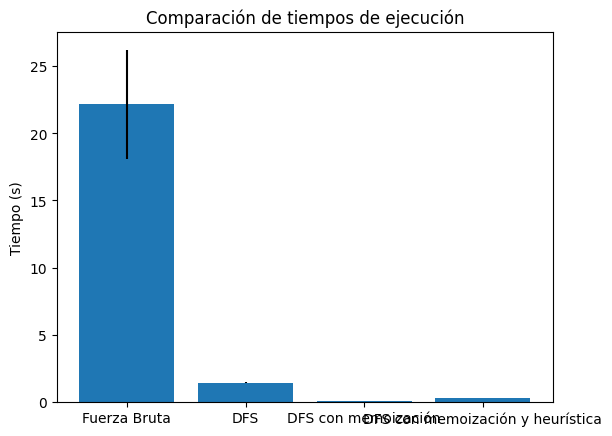

In [127]:
brute_force_time = [time_test(lambda: fuerza_bruta.find_values()) for _ in range(10)]
dfs_time = [time_test(buscar_min_max) for _ in range(10)]
dfs_memo_time = [time_test(buscar_min_max_memo) for _ in range(10)]
dfs_memo_heu_time = [time_test(buscar_min_max_memo_heu) for _ in range(10)]

brute_mean, brute_std = np.mean(brute_force_time), np.std(brute_force_time)
dfs_mean, dfs_std = np.mean(dfs_time), np.std(dfs_time)
dfs_memo_mean, dfs_memo_std = np.mean(dfs_memo_time), np.std(dfs_memo_time)
dfs_memo_heu_mean, dfs_memo_heu_std = np.mean(dfs_memo_heu_time), np.std(dfs_memo_heu_time)

plt.bar(["Fuerza Bruta", "DFS", "DFS con memoización", "DFS con memoización y heurística"], [brute_mean, dfs_mean, dfs_memo_mean, dfs_memo_heu_mean], yerr=[brute_std, dfs_std, dfs_memo_std, dfs_memo_heu_std])
plt.ylabel("Tiempo (s)")
plt.title("Comparación de tiempos de ejecución")
plt.show()


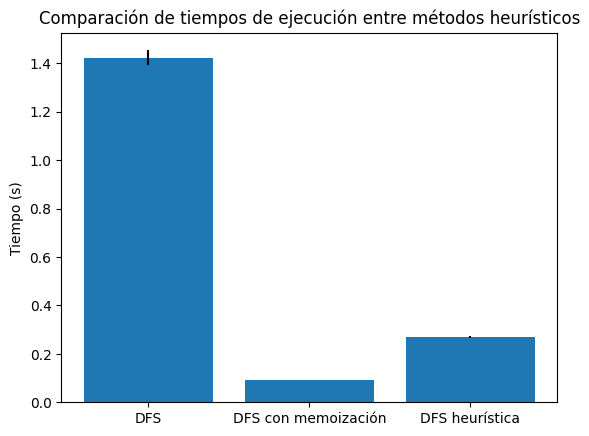

In [132]:
plt.bar(["DFS", "DFS con memoización", "DFS heurística"], [dfs_mean, dfs_memo_mean, dfs_memo_heu_mean], yerr=[dfs_std, dfs_memo_std, dfs_memo_heu_std])
plt.ylabel("Tiempo (s)")
plt.title("Comparación de tiempos de ejecución entre métodos heurísticos")
plt.show()

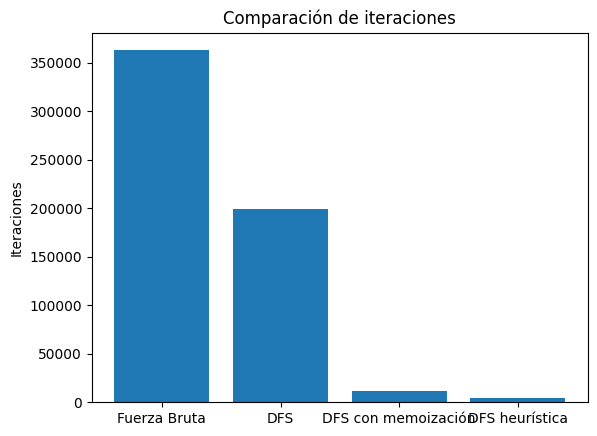

In [133]:
plt.bar(["Fuerza Bruta", "DFS", "DFS con memoización", "DFSheurística"], [iteraciones_fuerza_bruta, buscar_min_max()[1][0], buscar_min_max_memo()[1][0], buscar_min_max_memo_heu()[1][0]])
plt.ylabel("Iteraciones")
plt.title("Comparación de iteraciones")
plt.show()

Observando que para nuestro caso en particular es más eficiente y exacto el método de DFS con memoización. Aunque en términos de iteraciones es mejor el DFS con heurística, pero se pierde la exactitud de los resultados.

## Métodos metaheurísticos


###  Algoritmo genético

In [47]:
import random
from collections import namedtuple
import re

# Definir operadores disponibles
OPS = ['+', '-', '*', '/']
NUMBERS = list(range(1, 10))

# Definir estructura de una expresión
Expression = namedtuple('Expression', ['expr', 'value'])

# Evaluar una expresión
def evaluar_expresion_gen(expresion):
    num, ops = extraer_componentes(expresion)

    if len(list(set(ops))) != 4 or len(list(set(num))) != 5:  # Verificar que no se repitan números u operadores
        return None

    resultado = eval(expresion)

    # Verificamos que el resultado sea un entero
    if isinstance(resultado, int) or (isinstance(resultado, float) and resultado.is_integer()):
        return int(resultado)

    return None

# Generar una expresión aleatoria sin repetir números u operadores
def generar_expresion():
    while True:
        numeros_disponibles = random.sample(NUMBERS, 5)  # Escoger 5 números sin repetir
        operadores_disponibles = random.sample(OPS, 4)  # Escoger 4 operadores sin repetir

        expr = str(numeros_disponibles[0])
        for i in range(4):
            expr += operadores_disponibles[i] + str(numeros_disponibles[i + 1])

        value = evaluar_expresion_gen(expr)

        if value is not None:  # Si la expresión es válida, retornarla
            return Expression(expr, value)

# Selección de mejores individuos
def seleccion(poblacion, top_n=10):
    poblacion_valida = [expr for expr in poblacion if expr.value is not None]
    # Seleccionamos a los mejores individuos organizando los valores, recordando que se busca el máximo y el mínimo
    return sorted(poblacion_valida, key=lambda x: x.value)[:top_n] + sorted(poblacion_valida, key=lambda x: x.value)[-top_n:]

# Cruce entre 3 expresiones
def cruce(expr1, expr2, expr3):
    # Combinamos las expresiones

    nums1, ops1 = extraer_componentes(expr1.expr)
    nums2, ops2 = extraer_componentes(expr2.expr)
    nums3, ops3 = extraer_componentes(expr3.expr)

    # Se combinan los números y operadores de las expresiones
    nums1 = nums1[:2] + nums2[2:4] + nums3[4:]
    ops1 = ops1[:2] + ops2[2:4] + ops3[4:]

    nueva_expr = str(nums1[0])
    for i in range(4):
        nueva_expr += ops1[i] + str(nums1[i + 1])

    nuevo_valor = evaluar_expresion_gen(nueva_expr)
    #Si el valor es invalido se retorna la primera expresión
    return Expression(nueva_expr, nuevo_valor) if nuevo_valor is not None else expr1

# Extraer números y operadores de una expresión
def extraer_componentes(expr):
    nums = list(map(int, re.findall(r'\d+', expr)))
    ops = [o for o in expr if o in OPS]
    return nums, ops

# Mutación aleatoria de una expresión sin repetir números u operadores
def mutacion(expr):
    #La mutación la definimos como una reorganización aleatoria de los números y operadores
    nums, ops = extraer_componentes(expr.expr)
    random.shuffle(nums)
    random.shuffle(ops)

    nueva_expr = str(nums[0])
    for i in range(4):
        nueva_expr += ops[i] + str(nums[i + 1])

    nuevo_valor = evaluar_expresion_gen(nueva_expr)
    #Se evalua la expresión y se retorna si es válida de lo contrario se retorna la expresión original
    return Expression(nueva_expr, nuevo_valor) if nuevo_valor is not None else expr

# Algoritmo genético
def algoritmo_genetico(generaciones=100, poblacion_size=50, print_results=False):
    poblacion = [generar_expresion() for _ in range(poblacion_size)]
    for i in range(generaciones):
        poblacion = seleccion(poblacion)
        nueva_poblacion = []

        # Conservamos algunos de los mejores individuos
        nueva_poblacion.extend(sorted(poblacion, key=lambda x: x.value)[:20] + sorted(poblacion, key=lambda x: x.value)[-20:])

        while len(nueva_poblacion) < poblacion_size:

            p1, p2, p3 = random.sample(poblacion, 3)

            hijo = cruce(p1, p2, p3)
            if random.random() < 0.2:  # Probabilidad de mutación
                hijo = mutacion(hijo)
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion

        if i % 25 == 0 and print_results:
            min_val, max_val = min(poblacion, key=lambda x: x.value), max(poblacion, key=lambda x: x.value)
            print("Máximo y minimo de la población", i, ":", min_val.value, max_val.value)


    min_val = min(poblacion, key=lambda x: x.value)
    max_val = max(poblacion, key=lambda x: x.value)
    return min_val, max_val

# Ejecutar algoritmo
total_generaciones = 75
total_poblacion = 500
min_expr, max_expr = algoritmo_genetico(total_generaciones, total_poblacion, True)

print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")


Máximo y minimo de la población 0 : -65 77
Máximo y minimo de la población 25 : -65 77
Máximo y minimo de la población 50 : -65 77
Mínimo encontrado: 2+5-8*9/1 = -65
Máximo encontrado: 7-2+8/1*9 = 77


En este caso se experimentan con varios valores de generaciones y total de población, los mejores resultados se encuentran a valores altos de población y pocas generaciones, teniendo menor efecto la cantidad de generaciones, ya que los algoritmos generadores y la segregación de los mejores individuos es más efectiva en la población inicial.

Como podemos observar en el método anterior otra posible solución sería la generación aleatoria de expresiones sin un rumbo fijo, debido al buen comportamiento de la generación aleatoria, así que si tomamos esta generación de la forma.

Para este algoritmo su complejidad es dependiendo de los componentes, casi todos poseen complejidad $O(n)$, ya que solo se realizan asignaciones a excepción de la selección de individuos donde se realiza un ordenamiento, teniendo complejidad de $O(n \cdot log(n))$, teniendo en cuenta que se realiza sobre $m$ generaciones la complejidad total es de $O(m \cdot n \cdot log(n))$ donde $m$ es el número de generaciones y $n$ es el tamaño de la población, ya que se deben evaluar todas las expresiones de la población en cada generación.

Así para los métodos aplicados con anterioridad es el mejor de los algoritmos pese a que no se tenga un resultado óptimo.

### Búsqueda aleatoria

In [5]:
def random_search(poblacion=500):
    poblacion = [generar_expresion() for _ in range(poblacion)]
    min_val = min(poblacion, key=lambda x: x.value)
    max_val = max(poblacion, key=lambda x: x.value)
    return min_val, max_val

min_expr, max_expr = random_search(1000)
print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")

Mínimo encontrado: 3/1+5-9*8 = -64
Máximo encontrado: 9*8+7-4/2 = 77


Pero claro, este método al no tener una dirección fija, solo funcionaria para casos de números pequeños, como el caso trabajado además de no poder cerciorar si existe continuidad en los resultados.

En este caso su complejidad se reduce a $O(n)$, ya que solo se generan expresiones aleatorias y se evalúan, sin embargo, al no tener una dirección fija se puede tardar más en encontrar una solución óptima y para grandes valores de $n$ no es viable.

### Comparación de métodos metaheurísticos

En este caso al no generar una solución optima y solo una aproximación compararemos tanto tiempo de ejection como su desviación a la distancia con respecto a la solución óptima.

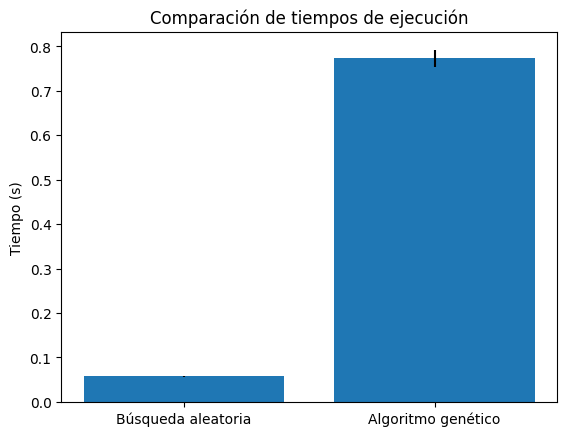

In [45]:
# Obtenemos los resultados de los métodos metaheurísticos

genetic_time = [time_test(lambda: algoritmo_genetico(total_generaciones, total_poblacion)) for _ in range(10)]
random_time = [time_test(lambda: random_search(1000)) for _ in range(10)]

genetic_mean, genetic_std = np.mean(genetic_time), np.std(genetic_time)
random_mean, random_std = np.mean(random_time), np.std(random_time)

plt.bar(['Búsqueda aleatoria', 'Algoritmo genético'], [random_mean, genetic_mean], yerr=[random_std, genetic_std])
plt.ylabel('Tiempo (s)')
plt.title('Comparación de tiempos de ejecución')
plt.show()


Iteraciones [11751]
Mejora con respecto al método anterior:  96.76 %
Es continuo el resultado? no


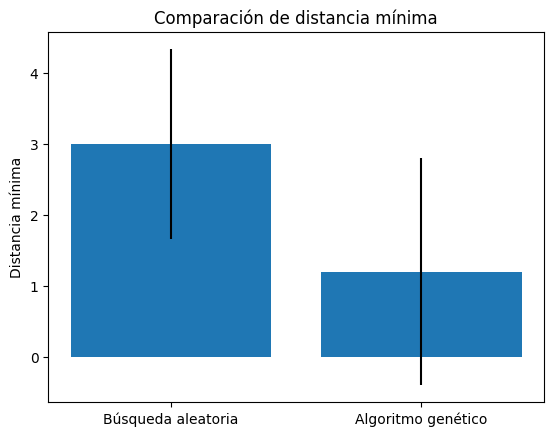

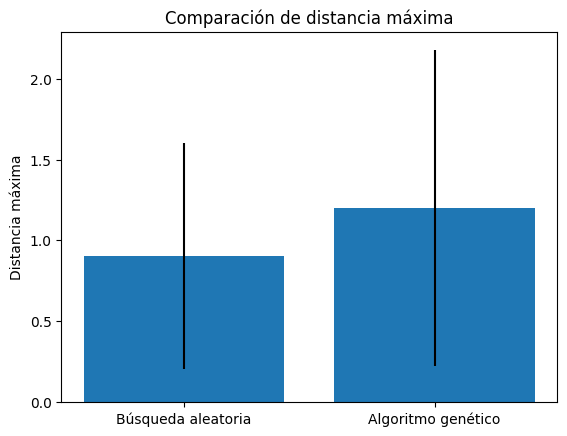

In [60]:
# Obtenemos los resultados reales
min_val, max_val = buscar_min_max_memo(True)

# Calculamos la distancia de los resultados reales con los obtenidos
def distancia_resultados(real, obtenido):
    return abs(real[0] - obtenido[0]), abs(real[1] - obtenido[1])

def transformar_resultados(resultados):
    return [r.value for r in resultados]

genetic_distance = [distancia_resultados((min_val, max_val), transformar_resultados(algoritmo_genetico(total_generaciones, total_poblacion, False))) for _ in range(10)]
random_distance = [distancia_resultados((min_val, max_val), transformar_resultados(random_search(1000))) for _ in range(10)]

genetic_mean, genetic_std = np.mean(genetic_distance, axis=0), np.std(genetic_distance, axis=0)
random_mean, random_std = np.mean(random_distance, axis=0), np.std(random_distance, axis=0)

plt.bar(['Búsqueda aleatoria', 'Algoritmo genético'], [random_mean[0], genetic_mean[0]], yerr=[random_std[0], genetic_std[0]])
plt.ylabel('Distancia mínima')
plt.title('Comparación de distancia mínima')
plt.show()

plt.bar(['Búsqueda aleatoria', 'Algoritmo genético'], [random_mean[1], genetic_mean[1]], yerr=[random_std[1], genetic_std[1]])
plt.ylabel('Distancia máxima')
plt.title('Comparación de distancia máxima')
plt.show()

Para estos casos, y como se menciona anteriormente es mejor realizar la búsqueda aleatoria tanto en tiempo de ejecución como en valores aproximados al máximo y mínimo de la solución. Aunque cabe resaltar que si se escala el problema a por ejemplo más números el método aleatorio no puede ser tan viable.

Con respecto a los algoritmos heurísticos, al menos en tiempo de ejecución es mejor la búsqueda en profundidad con poda y memoria ya que tiene un resultado determinista y puede ser más eficiente en términos de tiempo.



Respuesta

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta

Para este problema podemos expandir la serie de números a analizar, digamos que podemos tener $n$ números y mantenemos las operaciones así podemos establecer los valores numéricos de la siguiente forma:

In [136]:
new_numbers = [random.randint(1, 1000) for _ in range(50)]
new_numbers = list(set(new_numbers))
new_numbers = [number for number in new_numbers if number != 0]
print("Tamaño de la lista de números:", len(new_numbers))

NUMBERS = new_numbers

Tamaño de la lista de números: 50


Aplica el algoritmo al juego de datos generado

Tengamos en cuenta que como sabemos para 10000 números la fuerza bruta equivaldría a:

$$
P_{50,5} = \frac{50!}{50!-5!} = 254251200
$$

Esto por la combinación de signos se obtiene:

$$
P_{4} = 4! = 24
$$

Dando un total de:

$$
9034502400 * 24 = 6102028800
$$

Iteraciones necesarias para resolver el algoritmo por fuerza bruta

Respuesta

In [165]:
import time

#Generamos una función para medir el tiempo de los ejemplos, se usará como decorador
def medir_tiempo(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Tiempo de ejecución de {func.__name__}: {elapsed_time:.4f} segundos")
        return result, elapsed_time
    return wrapper

In [166]:

#Redefinimos las funciones con el decorador
@medir_tiempo
def buscar_min_max_memo_time(numeros=None, print_results=False):
    return buscar_min_max_memo(numeros, print_results)

@medir_tiempo
def buscar_min_max_memo_heu_time(numeros=None, print_results=False):
    return buscar_min_max_memo_heu(numeros, print_results)

@medir_tiempo
def algoritmo_genetico_time(generaciones=100, poblacion_size=50, print_results=False):
    return algoritmo_genetico(generaciones, poblacion_size, print_results)

@medir_tiempo
def random_search_time(poblacion=500):
    return random_search(poblacion)


In [160]:

#Para el mejor algoritmo de búsqueda en profundidad con poda y memoria
(min_val, max_val), _ = buscar_min_max_memo_time(NUMBERS[:], True)

print("Búsqueda en profundidad con poda y memoria")
print("Mínimo:", min_val)
print("Máximo:", max_val)
print("-"*50, "\n")


# Para el algoritmo genético
(min_expr, max_expr), _ = algoritmo_genetico_time(75, 500, True)

print("Algoritmo genético")
print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")
print("-"*50, "\n")

# Para la búsqueda aleatoria
(min_expr, max_expr), _ = random_search_time(1000)

print("Búsqueda aleatoria")
print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")

Iteraciones [37437586]
Mejora con respecto al método anterior: -837.89 %
Es continuo el resultado? no
Tiempo de ejecución de buscar_min_max_memo_time: 353.5975 segundos
Búsqueda en profundidad con poda y memoria
Mínimo: -969189
Máximo: 969207
-------------------------------------------------- 

Máximo y minimo de la población 0 : -590431 855904
Máximo y minimo de la población 25 : -924573 925831
Máximo y minimo de la población 50 : -924573 925831
Tiempo de ejecución de algoritmo_genetico_time: 2.6904 segundos
Algoritmo genético
Mínimo encontrado: 328-939*985+868/62 = -924573
Máximo encontrado: 939*985-868/62+930 = 925831
-------------------------------------------------- 

Tiempo de ejecución de random_search_time: 1.7983 segundos
Búsqueda aleatoria
Mínimo encontrado: 248/62+694-664*984 = -652678
Máximo encontrado: 930*934+868-310/62 = 869483


Como se menciona anteriormente, para valores altos de $n$ la mejor búsqueda es por medio del algoritmo genético, aunque este no encuentre un valor óptimo, su aproximación es mejor que la búsqueda aleatoria y en un tiempo de tan solo 1.2 segundos comparado con los 289 de la búsqueda profunda con poda y memoria, ya que su complejidad algorítmica es menor a $O(n!)$.

Adicionalmente, este valor se puede acercar más incrementando su población y generaciones, aunque claro esto puede aumentar el tiempo de ejecución.

In [55]:
(min_expr, max_expr), _ = algoritmo_genetico_time(100, 3000, True)

print("Algoritmo genético")
print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")
print("-"*50, "\n")


# Para la búsqueda aleatoria
(min_expr, max_expr), _ = random_search_time(3000)

print("Búsqueda aleatoria")
print(f"Mínimo encontrado: {min_expr.expr} = {min_expr.value}")
print(f"Máximo encontrado: {max_expr.expr} = {max_expr.value}")



Máximo y minimo de la población 0 : -983643 984522
Máximo y minimo de la población 25 : -983778 984522
Máximo y minimo de la población 50 : -983778 984522
Máximo y minimo de la población 75 : -983778 984522
Tiempo de ejecución de algoritmo_genetico_time: 10.0060 segundos
Algoritmo genético
Mínimo encontrado: 342/6+180-985*999 = -983778
Máximo encontrado: 985*999-682/2+848 = 984522
-------------------------------------------------- 

Tiempo de ejecución de random_search_time: 1.7298 segundos
Búsqueda aleatoria
Mínimo encontrado: 134+446/2-958*999 = -956685
Máximo encontrado: 964*999+228/19-833 = 962215


Por otra parte, el algoritmo de poda y memoria con heurística no es más eficiente al menos en términos de tiempo comparado con el de simple poda y memoria, posiblemente por el componente de historia al tener que hacer más operaciones, aunque claro, su aproximación es mejor que la búsqueda aleatoria.

In [179]:
new_numbers = [random.randint(1, 1000) for _ in range(30)]
new_numbers = list(set(new_numbers))
new_numbers = [number for number in new_numbers if number != 0]

#Para el mejor algoritmo de búsqueda en profundidad con poda, memoria y heurística
(min_val, max_val), _ = buscar_min_max_memo_heu_time(new_numbers[:], True)

print("Búsqueda en profundidad con poda, memoria y heurística")
print("Mínimo:", min_val)
print("Máximo:", max_val)
print("-"*50, "\n")


Iteraciones [315842]
Mejora con respecto al método anterior:  92.09 %
Es continuo el resultado? no
Tiempo de ejecución de buscar_min_max_memo_heu_time: 65.3409 segundos
Búsqueda en profundidad con poda, memoria y heurística
Mínimo: -942070
Máximo: 637287
-------------------------------------------------- 



### Escalabilidad en el tiempo y espacio

Podemos observar la escalabilidad en el tiempo con respecto a los datos de entrada de las funciones de la forma:

In [167]:
def make_random_list(n):
    new_numbers = [random.randint(1, 1000) for _ in range(n)]
    new_numbers = list(set(new_numbers))
    new_numbers = [number for number in new_numbers if number != 0]
    return new_numbers

n = range(1, 32, 3)

max_min_time = []
max_min_heu = []
genetic_time = []
random_time = []

for i in n:
    numbers = make_random_list(i)

    _, time_val = buscar_min_max_memo_time(numbers[:])
    max_min_time.append(time_val)

    _, time_val = buscar_min_max_memo_heu_time(numbers[:])
    max_min_heu.append(time_val)

    _, time_val = algoritmo_genetico_time(75, 500)
    genetic_time.append(time_val)

    _, time_val = random_search_time(1000)
    random_time.append(time_val)

Tiempo de ejecución de buscar_min_max_memo_time: 0.0000 segundos
Tiempo de ejecución de buscar_min_max_memo_heu_time: 0.0000 segundos
Tiempo de ejecución de algoritmo_genetico_time: 1.7818 segundos
Tiempo de ejecución de random_search_time: 1.6180 segundos
Tiempo de ejecución de buscar_min_max_memo_time: 0.0010 segundos
Tiempo de ejecución de buscar_min_max_memo_heu_time: 0.0015 segundos
Tiempo de ejecución de algoritmo_genetico_time: 1.7709 segundos
Tiempo de ejecución de random_search_time: 1.5688 segundos
Tiempo de ejecución de buscar_min_max_memo_time: 0.0165 segundos
Tiempo de ejecución de buscar_min_max_memo_heu_time: 0.0171 segundos
Tiempo de ejecución de algoritmo_genetico_time: 1.6914 segundos
Tiempo de ejecución de random_search_time: 1.5042 segundos
Tiempo de ejecución de buscar_min_max_memo_time: 0.0880 segundos
Tiempo de ejecución de buscar_min_max_memo_heu_time: 0.3653 segundos
Tiempo de ejecución de algoritmo_genetico_time: 1.7891 segundos
Tiempo de ejecución de random_s

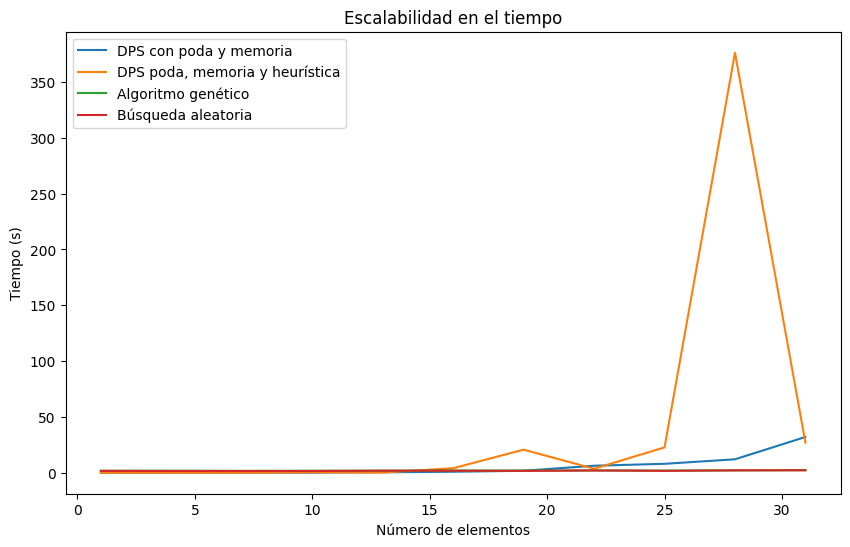

In [170]:
plt.figure(figsize=(10, 6))
plt.plot(n, max_min_time, label="DPS con poda y memoria")
plt.plot(n, max_min_heu, label="DPS poda, memoria y heurística")
plt.plot(n, genetic_time, label="Algoritmo genético")
plt.plot(n, random_time, label="Búsqueda aleatoria")
plt.xlabel("Número de elementos")
plt.ylabel("Tiempo (s)")
plt.legend()
plt.title("Escalabilidad en el tiempo")
plt.show()

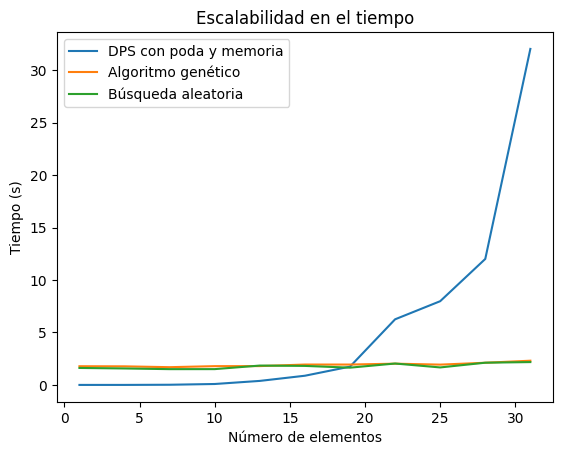

In [172]:
plt.plot(n, max_min_time, label="DPS con poda y memoria")
plt.plot(n, genetic_time, label="Algoritmo genético")
plt.plot(n, random_time, label="Búsqueda aleatoria")
plt.xlabel("Número de elementos")
plt.ylabel("Tiempo (s)")
plt.legend()
plt.title("Escalabilidad en el tiempo")
plt.show()

De esta forma ejemplificando el problema mencionado anteriormente, aunque se desarollen tecnicas de poda, memoria y heurisitica, la complejidad algoritmica sigue siendo $O(n!)$, por lo que para valores altos de $n$ no es viable el uso de estos métodos, por otro lado, el algoritmo genético es más eficiente en términos de tiempo y espacio, aunque claro, no se obtiene un resultado óptimo.

In [174]:
n = range(1, 100, 5)

genetic_time = []
random_time = []

for i in n:
    numbers = make_random_list(i)

    _, time_val = algoritmo_genetico_time(75, 500)
    genetic_time.append(time_val)

    _, time_val = random_search_time(1000)
    random_time.append(time_val)

Tiempo de ejecución de algoritmo_genetico_time: 2.1229 segundos
Tiempo de ejecución de random_search_time: 1.6942 segundos
Tiempo de ejecución de algoritmo_genetico_time: 1.7924 segundos
Tiempo de ejecución de random_search_time: 1.6708 segundos
Tiempo de ejecución de algoritmo_genetico_time: 1.9019 segundos
Tiempo de ejecución de random_search_time: 1.6915 segundos
Tiempo de ejecución de algoritmo_genetico_time: 2.1805 segundos
Tiempo de ejecución de random_search_time: 1.6913 segundos
Tiempo de ejecución de algoritmo_genetico_time: 2.0508 segundos
Tiempo de ejecución de random_search_time: 1.9110 segundos
Tiempo de ejecución de algoritmo_genetico_time: 2.3438 segundos
Tiempo de ejecución de random_search_time: 2.1223 segundos
Tiempo de ejecución de algoritmo_genetico_time: 2.1646 segundos
Tiempo de ejecución de random_search_time: 2.0220 segundos
Tiempo de ejecución de algoritmo_genetico_time: 2.2352 segundos
Tiempo de ejecución de random_search_time: 1.9557 segundos
Tiempo de ejecuc

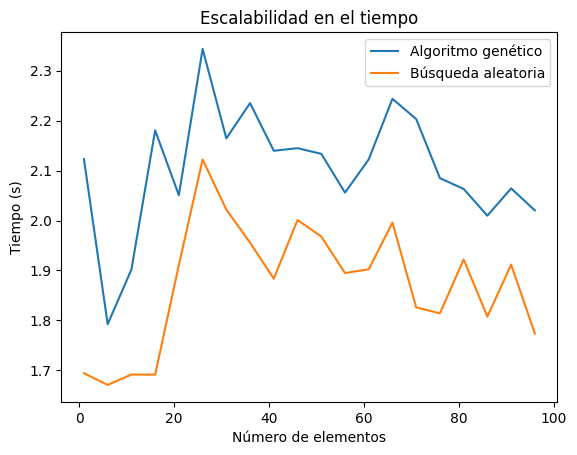

In [175]:
plt.plot(n, genetic_time, label="Algoritmo genético")
plt.plot(n, random_time, label="Búsqueda aleatoria")
plt.xlabel("Número de elementos")
plt.ylabel("Tiempo (s)")
plt.legend()
plt.title("Escalabilidad en el tiempo")
plt.show()

Como se puede observar ambos métodos no varían mucho respecto al tamaño de datos, lo cual es la ventaja del uso de la metaheurística, tener un tiempo y espacio controlado a problemas de gran escala.

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta



- A. Duarte Muñoz, Metaheurísticas. Dykinson, 2007. [En línea]. Disponible en: https://elibro.net/es/ereader/universidadviu/35696
- Raúl Reyero Díez, Algoritmos de optimización.



Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta

En este caso el estudio solo encontró resultados aproximados y no los optimos para valores de $n$ altos, y en el caso del problema inicial se logra mejorar un 98 % con respecto al método de fuerza bruta respecto a los métodos exactos. Además del estudio de la variación valores numéricos y el tamaño de la lista de entrada, otra fase del estudio puede ser en el caso de la adición de operaciones como raices, potencias, logaritmos, etc, otro punto de mejora es en la búsqueda heurística, por medio de la búsqueda profunda modificando la función de coste para una mejora adaptabilidad para $n$ escenarios.

En el caso de métodos metaheurísticos se puede probar con el recocido simulado o la colonia de hormigas para encontrar mejores resultados, además de la optimización de los parámetros de los algoritmos genéticos para encontrar mejores resultados, nuevas formas de recombinación o de mutación, con reglas específicas de generar "super hijos" mediante el ordenamiento de los números y su adición o sustracción dependiendo de la necesidad.

Adicional a esto en sendos casos se pueden implementar reglas específicas para el problema, el énfasis de este trabajo fue solucionarlo de manera general pero se vería beneficiado si a través de algunas operaciones semillas se pueda calcular cuál es el máximo o minimo de dicho conjunto de números, para luego procesarlo con un set de reglas que permita elegir entre los números y operaciones disponibles cual es su máximo o minimo.